In [1]:
!pip install pandas
import pandas as pd

In [2]:
!pip install seaborn
import seaborn as sns

In [3]:
!pip install matplotlib
import matplotlib.pyplot as plt

In [4]:
ethereum = pd.read_csv('C:/Users/user/Downloads/ETH-USD.csv')

In [5]:
#Relating with the df
ethereum.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [6]:
#Quality of data; ensuring there is no empty data or weird outliers
ethereum.isna().sum()
ethereum.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2.157000e+03
mean,1207.471340,1242.767934,1167.993290,1207.875751,1207.875751,1.213987e+10
std,1129.186851,1162.055277,1091.498596,1128.633872,1128.633872,1.031210e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,226.976364,231.755005,221.241760,227.138290,227.138290,4.612000e+09
50%,763.369995,796.439026,726.664001,772.640991,772.640991,9.364980e+09
75%,1833.715576,1862.914917,1798.406006,1832.999634,1832.999634,1.678856e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


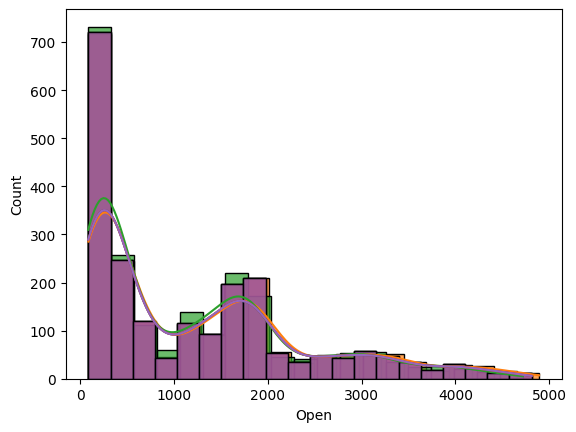

In [7]:
#Next We visualize the described data
for column in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
    sns.histplot(ethereum[column], kde=True, label=column, alpha=0.7)

plt.show()

In [8]:
#Preparing df for plotting
ethereum['Date'] = pd.to_datetime(ethereum['Date'])
e_open_monthly = ethereum.resample('M', on='Date')['Open'].mean()
e_open_monthly.index = e_open_monthly.index.strftime('%Y-%m')

In [10]:
print(e_open_monthly.head())

Date
2017-11     373.696317
2017-12     630.583997
2018-01    1093.099893
2018-02     882.527006
2018-03     640.787129
Name: Open, dtype: float64


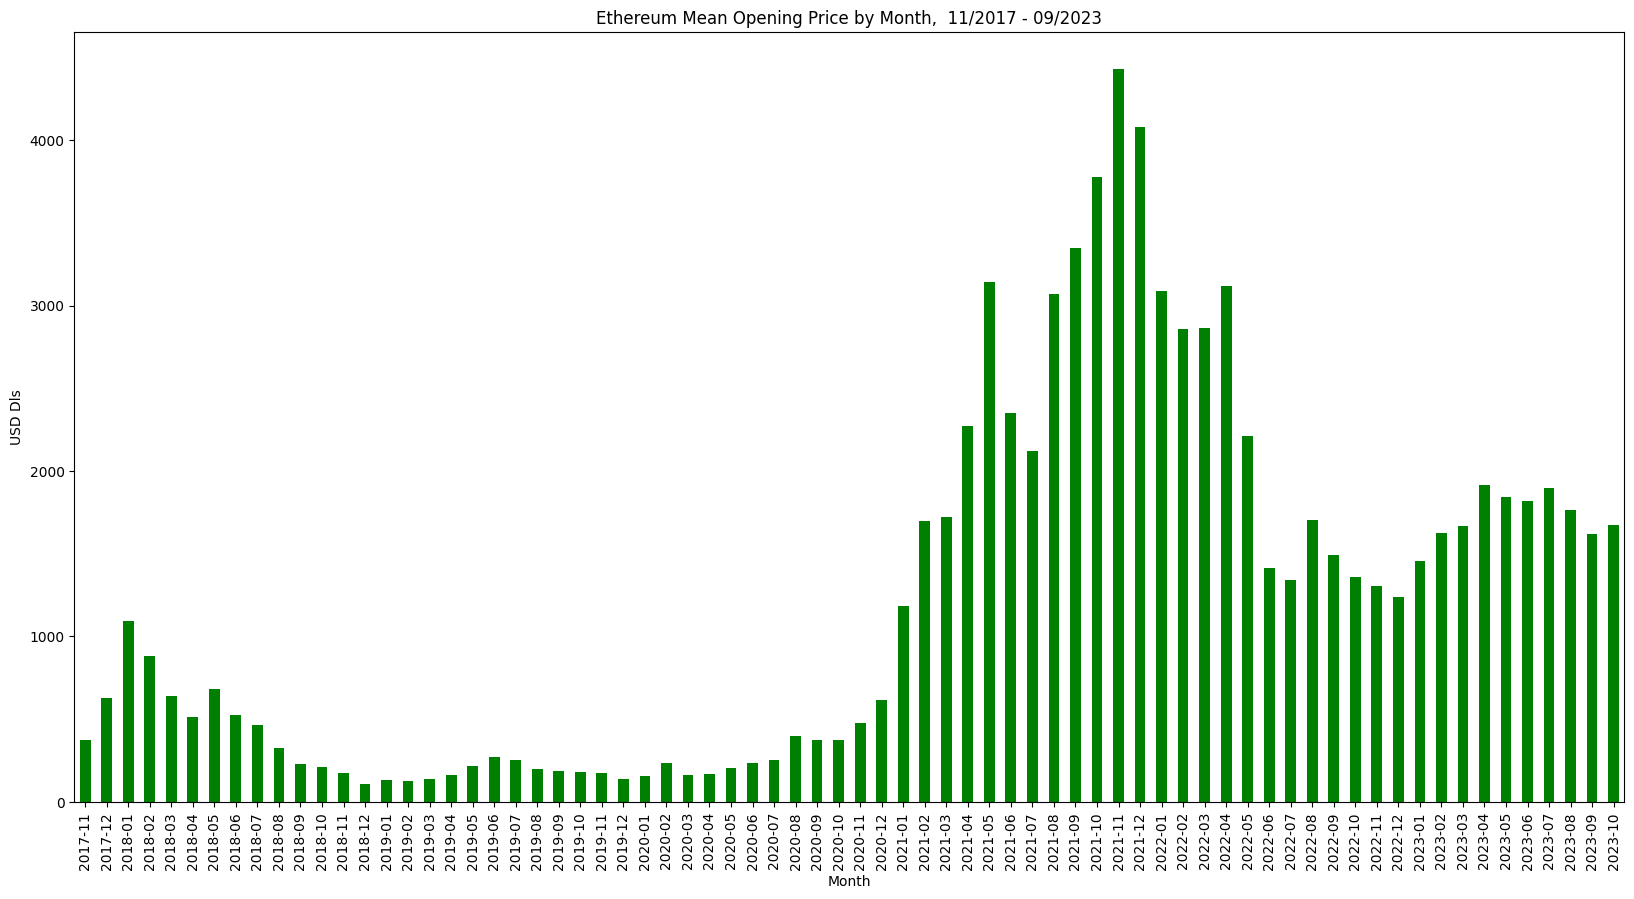

In [12]:
#Visualizing df through dates
plt.figure(figsize=(20, 10))
e_open_monthly.plot(kind='line', x='Date', y='Open', xlabel='Month', ylabel='USD Dls', color='green',
                      title='Ethereum Mean Opening Price by Month,  11/2017 - 09/2023')


plt.show()

In [15]:
#Preparing for plotting USD Dld differences through months
ethereum_monthly_diff = pd.DataFrame(e_open_monthly)
ethereum_monthly_diff['Month_diff'] = ethereum_monthly_diff['Open'].diff()
ethereum_monthly_diff['Open'] = pd.to_numeric(ethereum_monthly_diff['Open'], errors='coerce').fillna(0)
ethereum_monthly_diff['Month_diff'] = pd.to_numeric(ethereum_monthly_diff['Month_diff'], errors='coerce').fillna(0)
ethereum_monthly_diff= ethereum_monthly_diff.reset_index()

print(ethereum_monthly_diff.head(10))

      Date         Open  Month_diff
0  2017-11   373.696317    0.000000
1  2017-12   630.583997  256.887680
2  2018-01  1093.099893  462.515896
3  2018-02   882.527006 -210.572887
4  2018-03   640.787129 -241.739877
5  2018-04   512.148933 -128.638196
6  2018-05   682.046129  169.897196
7  2018-06   524.591968 -157.454161
8  2018-07   464.046514  -60.545454
9  2018-08   327.069223 -136.977291


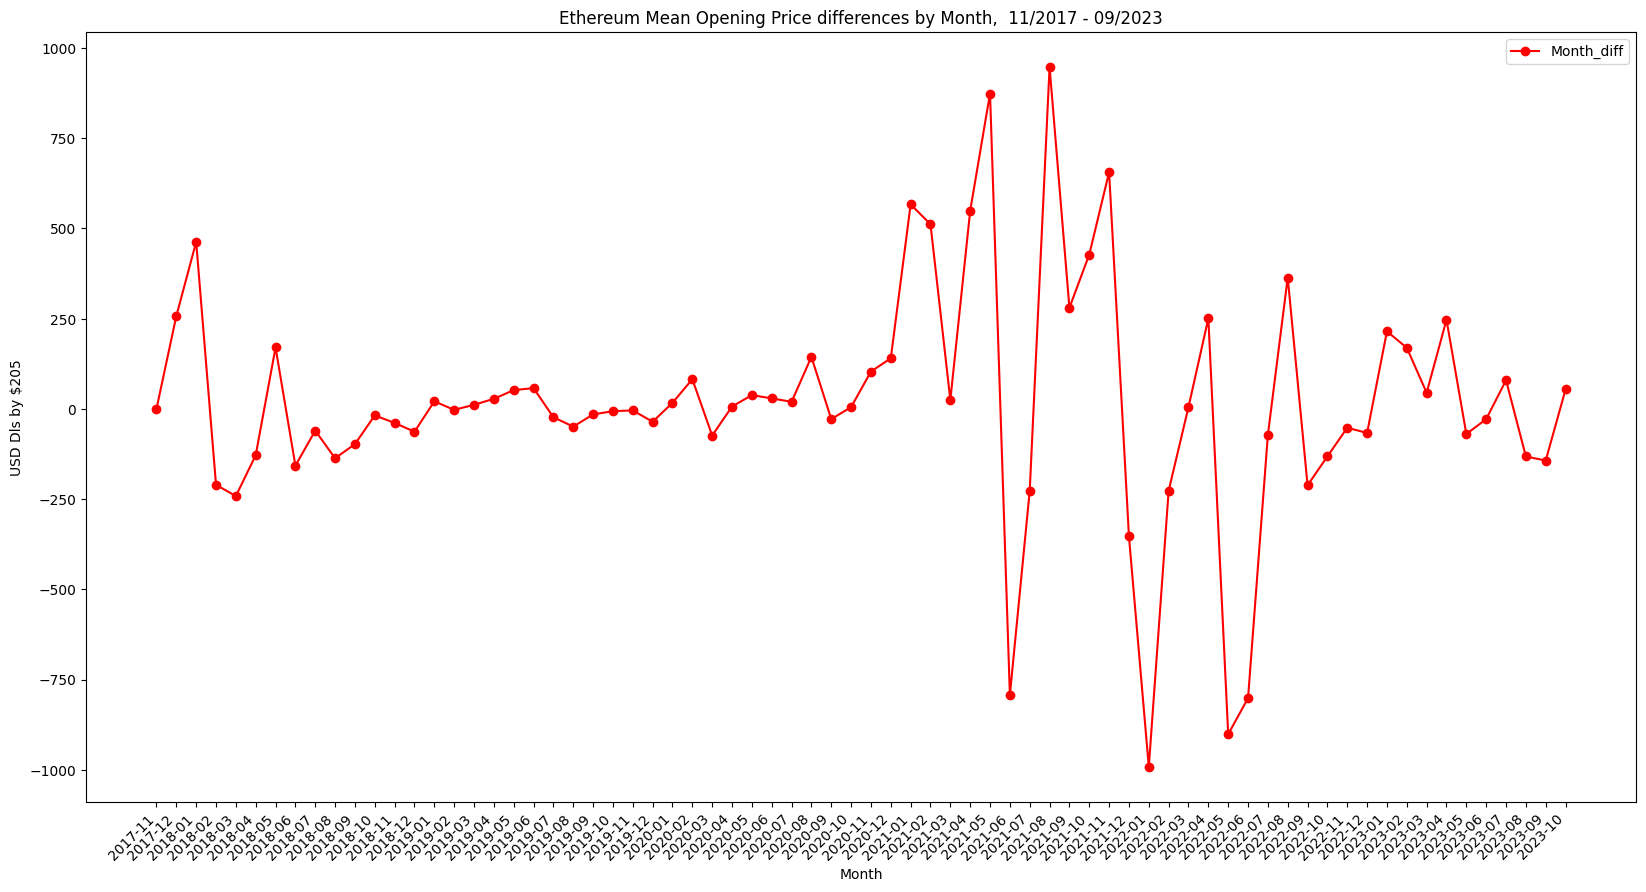

In [16]:

ax= ethereum_monthly_diff.plot(kind='line',x='Date', y='Month_diff', marker='o', xlabel='Month', ylabel='USD Dls by $205', color='red', 
                               title='Ethereum Mean Opening Price differences by Month,  11/2017 - 09/2023')
plt.gcf().set_size_inches(20, 10)
ax.set_xticks(range(len(ethereum_monthly_diff['Date'])))
ax.set_xticklabels(ethereum_monthly_diff['Date'], rotation=45, ha='right')
plt.show()

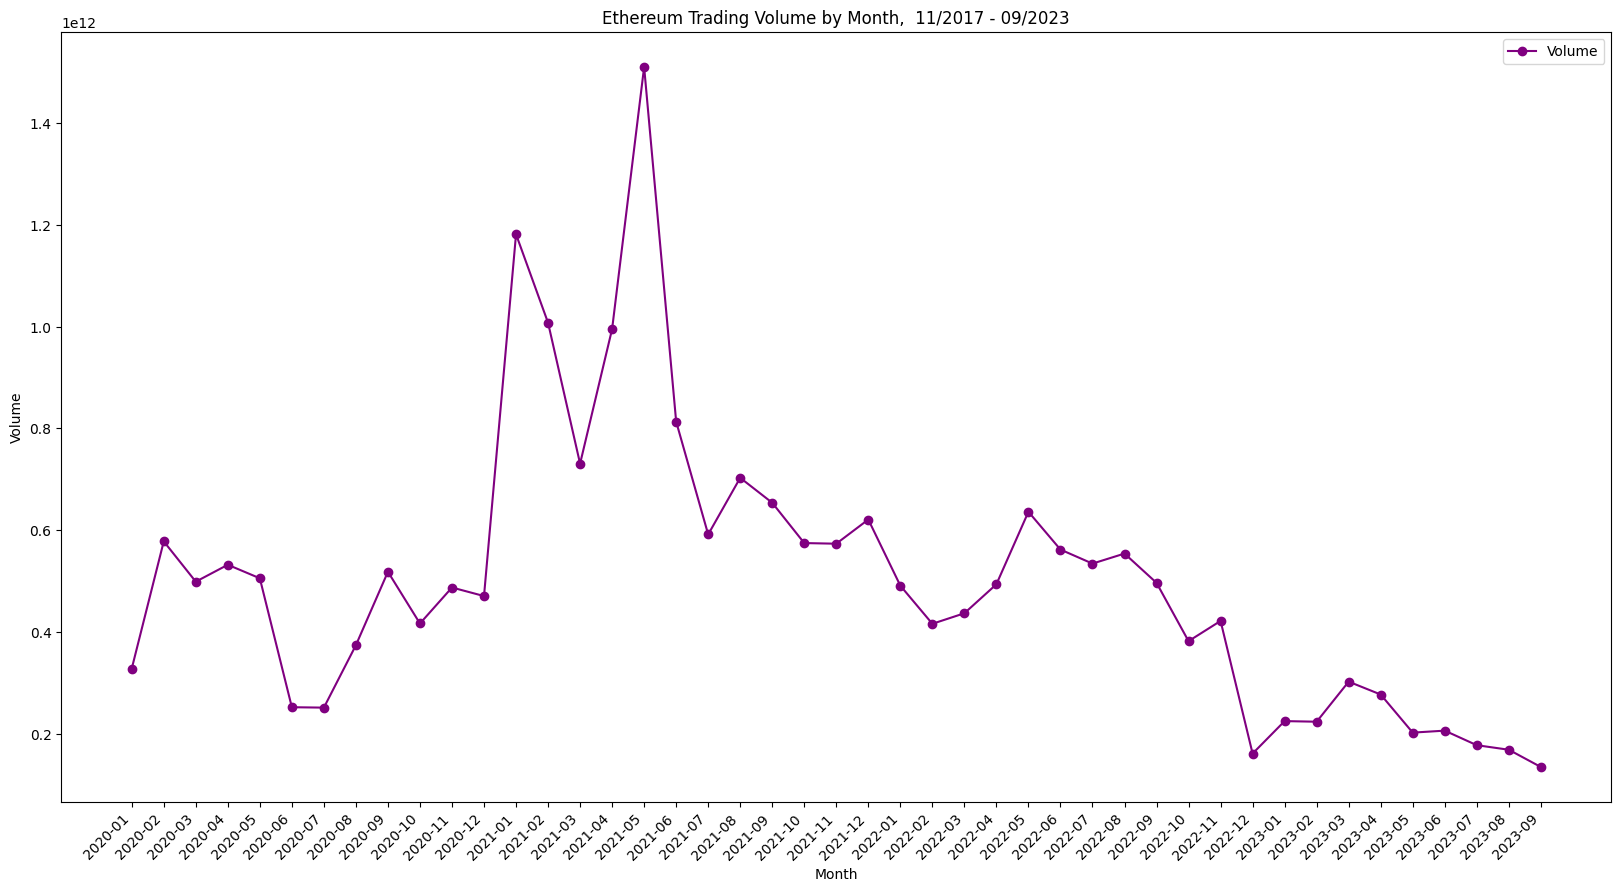

In [19]:
#Selecting and plotting data matching COVID-19 dates
ethereum['Date'] = pd.to_datetime(ethereum['Date'])
ethereum = ethereum[(ethereum['Date'] >= '2020-01') & (ethereum['Date'] < '2023-10')]
e_volume_monthly = ethereum.resample('M', on='Date')['Volume'].sum()
e_volume_monthly.index = e_volume_monthly.index.strftime('%Y-%m')
e_volume_monthly= e_volume_monthly.reset_index()

e_plotvolume = e_volume_monthly.plot(kind='line',x='Date', y='Volume', marker='o', xlabel='Month', ylabel='Volume', color='purple', 
                               title='Ethereum Trading Volume by Month,  11/2017 - 09/2023')
plt.gcf().set_size_inches(20, 10)
e_plotvolume.set_xticks(range(len(e_volume_monthly['Date'])))
e_plotvolume.set_xticklabels(e_volume_monthly['Date'], rotation=45, ha='right')


plt.show()